In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [3]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [4]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),                         
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [5]:
df = pd.read_csv("/Users/krrishjuneja/Desktop/Python project/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
df.shape

(918, 12)

In [7]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [9]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 918 observation and 12 columns in the dataset


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [13]:
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [14]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [15]:
df.duplicated().value_counts()

False    918
Name: count, dtype: int64

In [16]:
missing (df)

,Missing_Number,Missing_Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


Examination of Target Variable

In [17]:
first_looking("HeartDisease")

column name    :  HeartDisease
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
HeartDisease
1    508
0    410
Name: count, dtype: int64


HeartDisease
1    508
0    410
Name: count, dtype: int64


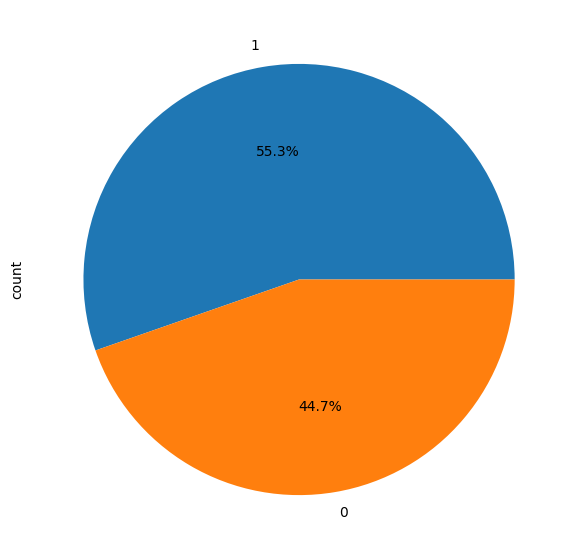

In [18]:
print(df["HeartDisease"].value_counts())
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(7,7));

In [19]:
y = df['HeartDisease']
heart_disease_percentage = round(y.value_counts(normalize=True)[1] * 100, 2)
not_heart_disease_percentage = round(y.value_counts(normalize=True)[0] * 100, 2)

print(f'Percentage of Heart Disease: {heart_disease_percentage}')
print(f'Percentage of NOT Heart Disease: {not_heart_disease_percentage}')
print(f"{y.value_counts()[1]} cases for Heart Disease")
print(f"{y.value_counts()[0]} cases for NOT Heart Disease")

Percentage of Heart Disease: 55.34
Percentage of NOT Heart Disease: 44.66
508 cases for Heart Disease
410 cases for NOT Heart Disease


In [20]:
df['HeartDisease'].describe().T

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [21]:
df[df['HeartDisease']==0].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049,0.0
std,9.444915,16.499585,74.634659,0.309894,23.288067,0.699709,0.0
min,28.000000,80.000000,0.000000,0.000000,69.000000,-1.100000,0.0
25%,43.000000,120.000000,197.250000,0.000000,134.000000,0.000000,0.0
50%,51.000000,130.000000,227.000000,0.000000,150.000000,0.000000,0.0
75%,57.000000,140.000000,266.750000,0.000000,165.000000,0.600000,0.0
max,76.000000,190.000000,564.000000,1.000000,202.000000,4.200000,0.0


In [22]:
df[df['HeartDisease']==1].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


In [23]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.


In [24]:
fig = px.histogram(df, x='HeartDisease')
fig.show()

In [25]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')


Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [26]:


df[numerical].iplot(kind='histogram', subplots=True,bins=50)

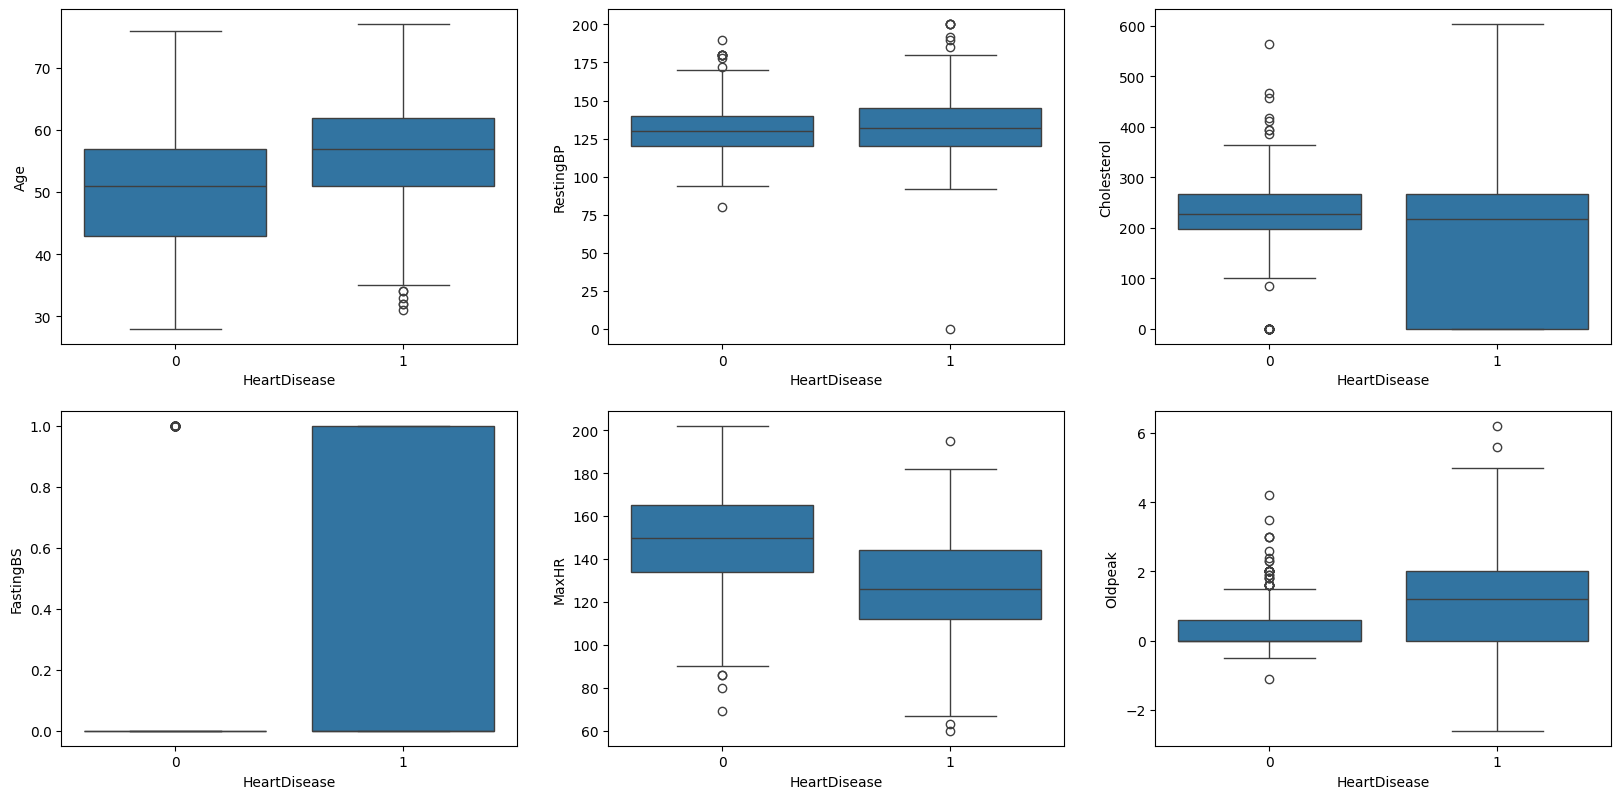

In [27]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=df)

In [28]:
df[categorical].value_counts()

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M    ASY            Normal      Y               Flat        109
     ATA            Normal      N               Up           64
     ASY            Normal      N               Flat         55
                    ST          Y               Flat         49
     NAP            Normal      N               Up           46
                                                           ... 
F    NAP            ST          Y               Flat          1
     TA             LVH         N               Up            1
                    Normal      N               Down          1
M    ATA            LVH         Y               Flat          1
     TA             ST          Y               Flat          1
Name: count, Length: 95, dtype: int64

In [29]:
df = pd.get_dummies(df, drop_first=True)

In [30]:
df.shape

(918, 16)

APPLYING DIFFERENT MODELS


In [31]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state = 101)

In [33]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import   f1_score, accuracy_score, recall_score,precision_score

Support  Vector Machine

In [37]:

from sklearn.svm import SVC
SVM_model = SVC(random_state=42)
SVM_model.fit(X_train_scaled, y_train)
y_pred = SVM_model.predict(X_test_scaled)
y_train_pred = SVM_model.predict(X_train_scaled)

svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)


print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")


train_val(y_train, y_train_pred, y_test, y_pred)

[[ 87  16]
 [ 13 114]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       103
           1       0.88      0.90      0.89       127

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

--------------------------------------------------------


,train_set,test_set
Accuracy,0.883721,0.873913
Precision,0.873449,0.876923
f1,0.897959,0.887160


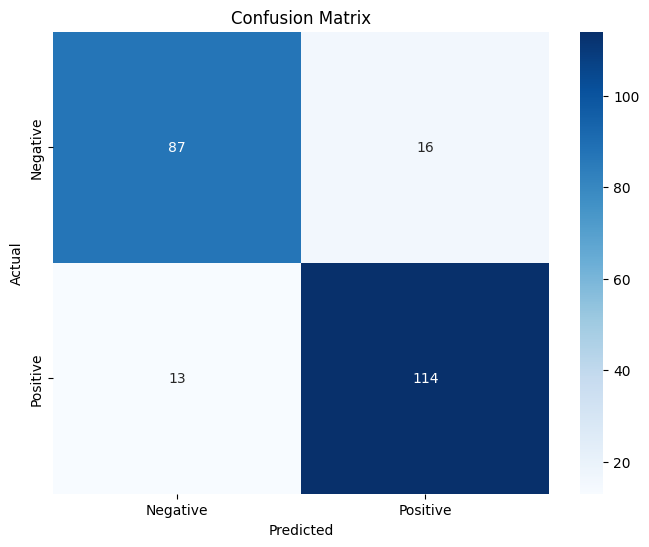

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



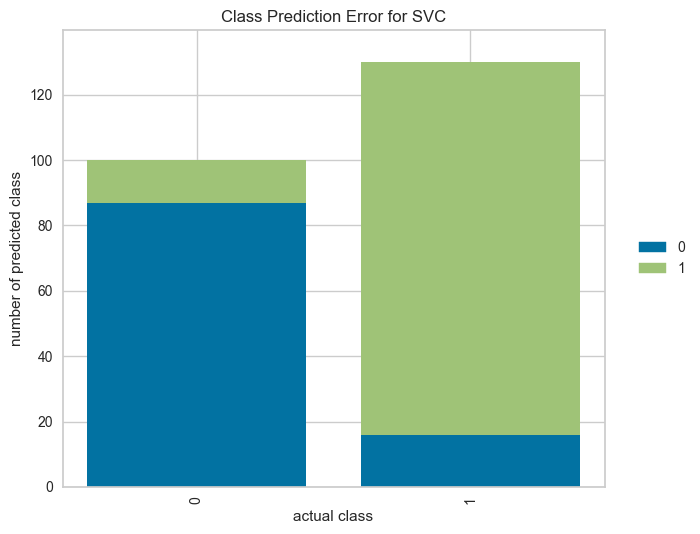

In [39]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(SVM_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

In [40]:
from sklearn.model_selection import  cross_validate
svm_xvalid_model = SVC()

svm_xvalid_model_scores = cross_validate(svm_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
svm_xvalid_model_scores = pd.DataFrame(svm_xvalid_model_scores, index = range(1, 11))

svm_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.004156,0.003383,0.782609,0.815789,0.794872,0.805195
2,0.004192,0.003351,0.753623,0.723404,0.894737,0.800000
3,0.003978,0.003012,0.927536,0.902439,0.973684,0.936709
4,0.004021,0.002733,0.811594,0.790698,0.894737,0.839506
5,0.003776,0.002678,0.884058,0.894737,0.894737,0.894737
6,0.003756,0.002938,0.797101,0.785714,0.868421,0.825000
7,0.003749,0.002499,0.782609,0.848485,0.736842,0.788732
8,0.003709,0.002973,0.884058,0.857143,0.947368,0.900000
9,0.003876,0.002683,0.882353,0.875000,0.921053,0.897436
10,0.003593,0.002435,0.926471,0.923077,0.947368,0.935065


In [41]:
svm_xvalid_model_scores.mean()[2:]

test_accuracy     0.843201
test_precision    0.841649
test_recall       0.887382
test_f1           0.862238
dtype: float64

Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier 
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
RF_model.fit(X_train_scaled, y_train)
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)

rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)


print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")



train_val(y_train, y_train_pred, y_test, y_pred)

[[ 81  22]
 [ 10 117]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       103
           1       0.84      0.92      0.88       127

    accuracy                           0.86       230
   macro avg       0.87      0.85      0.86       230
weighted avg       0.86      0.86      0.86       230

--------------------------------------------------------


,train_set,test_set
Accuracy,1.0,0.860870
Precision,1.0,0.841727
f1,1.0,0.879699


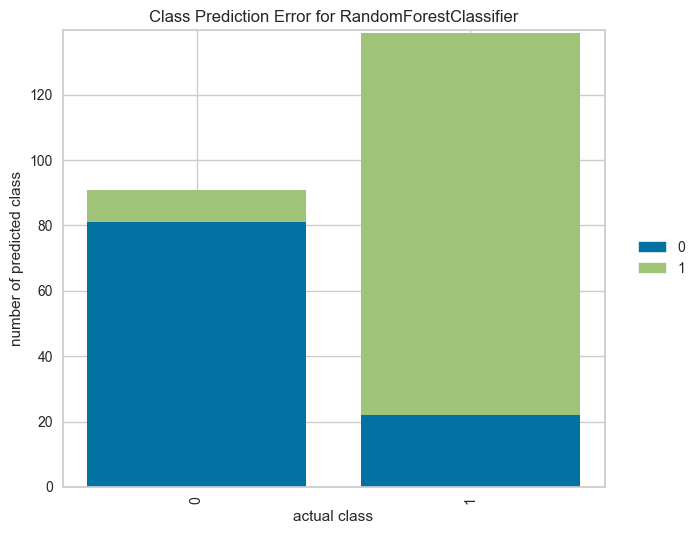

In [43]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

In [44]:
rf_xvalid_model = RandomForestClassifier(max_depth=None, random_state=101)

rf_xvalid_model_scores = cross_validate(rf_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
rf_xvalid_model_scores = pd.DataFrame(rf_xvalid_model_scores, index = range(1, 11))

rf_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.073402,0.004217,0.797101,0.820513,0.820513,0.820513
2,0.066574,0.004114,0.797101,0.772727,0.894737,0.829268
3,0.079918,0.003889,0.884058,0.857143,0.947368,0.900000
4,0.060302,0.003910,0.855072,0.868421,0.868421,0.868421
5,0.061347,0.003913,0.913043,0.921053,0.921053,0.921053
6,0.061498,0.003893,0.782609,0.767442,0.868421,0.814815
7,0.061621,0.004549,0.840580,0.864865,0.842105,0.853333
8,0.064836,0.003877,0.884058,0.875000,0.921053,0.897436
9,0.059746,0.003955,0.867647,0.837209,0.947368,0.888889
10,0.061797,0.003946,0.926471,0.923077,0.947368,0.935065


In [45]:
rf_xvalid_model_scores.mean()[2:]


test_accuracy     0.854774
test_precision    0.850745
test_recall       0.897841
test_f1           0.872879
dtype: float64

In [47]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.3 MB/s eta 0:00:0000:0100:010m


In [48]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(random_state=101)
XGB_model.fit(X_train_scaled, y_train)
y_pred = XGB_model.predict(X_test_scaled)
y_train_pred = XGB_model.predict(X_train_scaled)

xgb_f1 = f1_score(y_test, y_pred)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)


print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")


train_val(y_train, y_train_pred, y_test, y_pred)

[[ 86  17]
 [ 11 116]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       103
           1       0.87      0.91      0.89       127

    accuracy                           0.88       230
   macro avg       0.88      0.87      0.88       230
weighted avg       0.88      0.88      0.88       230

--------------------------------------------------------


,train_set,test_set
Accuracy,1.0,0.878261
Precision,1.0,0.872180
f1,1.0,0.892308


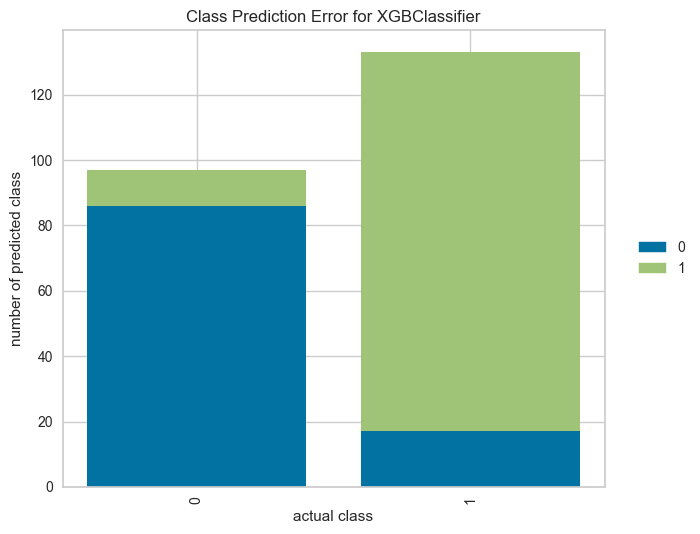

In [49]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(XGB_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

visualizer.poof();

In [50]:
xgb_xvalid_model = XGBClassifier(random_state=101)

xgb_xvalid_model_scores = cross_validate(xgb_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
xgb_xvalid_model_scores = pd.DataFrame(xgb_xvalid_model_scores, index = range(1, 11))

xgb_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.059271,0.002753,0.840580,0.868421,0.846154,0.857143
2,0.037797,0.002593,0.797101,0.785714,0.868421,0.825000
3,0.026825,0.002869,0.884058,0.875000,0.921053,0.897436
4,0.032606,0.002648,0.826087,0.825000,0.868421,0.846154
5,0.030834,0.002458,0.884058,0.894737,0.894737,0.894737
6,0.028600,0.002509,0.782609,0.780488,0.842105,0.810127
7,0.028965,0.002621,0.869565,0.871795,0.894737,0.883117
8,0.031374,0.002538,0.826087,0.825000,0.868421,0.846154
9,0.029440,0.002335,0.823529,0.825000,0.868421,0.846154
10,0.030437,0.002377,0.882353,0.916667,0.868421,0.891892


In [51]:
xgb_xvalid_model_scores.mean()

fit_time          0.033615
score_time        0.002570
test_accuracy     0.841603
test_precision    0.846782
test_recall       0.874089
test_f1           0.859791
dtype: float64

/var/folders/gz/pgdc8xgj6jv906fcwbl16fd40000gn/T/ipykernel_18686/4002245400.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/gz/pgdc8xgj6jv906fcwbl16fd40000gn/T/ipykernel_18686/4002245400.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/gz/pgdc8xgj6jv906fcwbl16fd40000gn/T/ipykernel_18686/4002245400.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




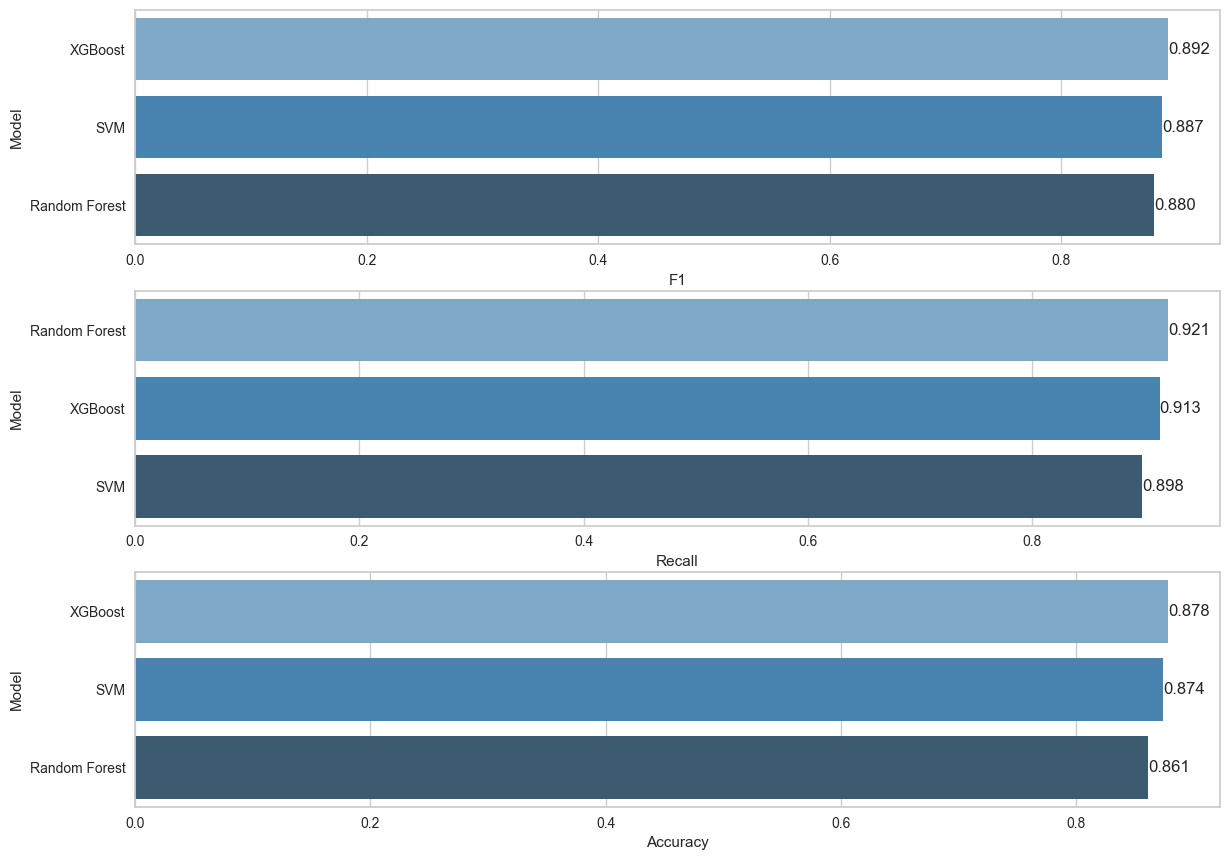

In [52]:
compare = pd.DataFrame({"Model": [ "SVM", "Random Forest", "XGBoost"],
                        "F1": [ svm_f1, rf_f1, xgb_f1],
                        "Recall": [ svm_recall, rf_recall, xgb_recall],
                        "Accuracy": [ svm_acc, rf_acc, xgb_acc],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,     
                '{:1.3f}'.format(width),           
                ha = 'left',                        
                va = 'center')                      
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)



plt.show()